In [1]:
!mkdir ../checkpoints
!wget https://openmmlab.oss-accelerate.aliyuncs.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth -P ../checkpoints

mkdir: 无法创建目录"../checkpoints": 文件已存在
--2021-09-16 11:16:06--  https://openmmlab.oss-accelerate.aliyuncs.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
正在解析主机 openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.108.5.91
正在连接 openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.108.5.91|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 272761181 (260M) [application/octet-stream]
正在保存至: “../checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth.1”

deeplabv3_r50-d8_51 100%[===================>] 260.12M  11.2MB/s    用时 26s     

2021-09-16 11:16:32 (10.0 MB/s) - 已保存 “../checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth.1” [272761181/272761181])



In [2]:
import sys
sys.path.insert(0,'..')
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [6]:
config_file = '../configs/segformer/segformer_mit-b0_512x512_160k_ade20k.py'
checkpoint_file = '../checkpoints/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth'

In [7]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

../mmseg/models/backbones/mit.py:315: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


Use load_from_local loader


In [11]:
# test a single image
img = 'demo.png'
result = inference_segmentor(model, img)

../mmseg/models/segmentors/base.py:257: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


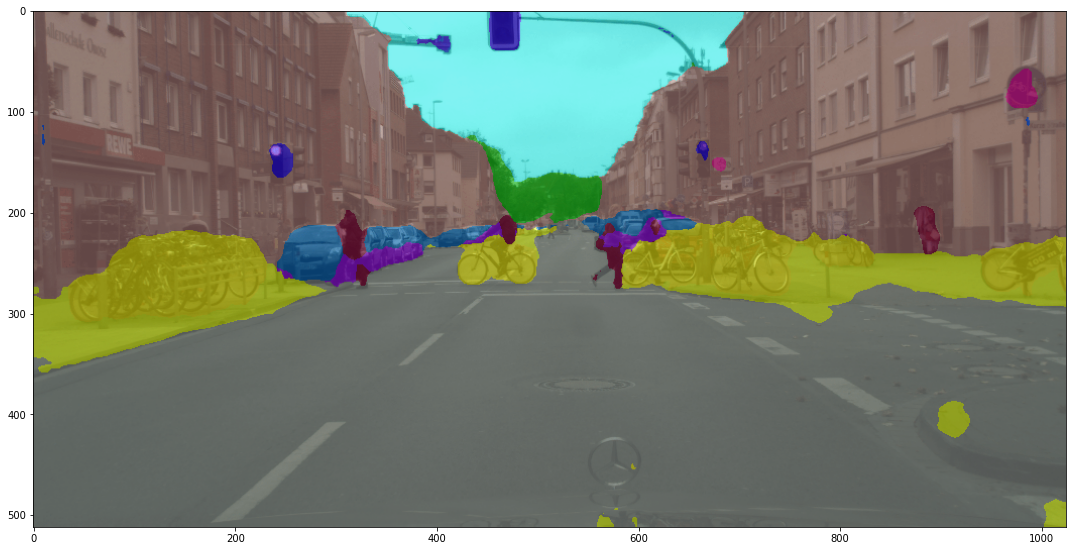

In [12]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))